# Problem Statement
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by 
"National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us 
to perform this prediction.

Constraints on data collection
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage

# Dataset:
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

# 1. Import Libraries and load dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [31]:
from sklearn import metrics

In [ ]:
df = pd.read_csv('pima-indians-diabetes+(3).csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number 
of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma 
separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What 
information is available about the data.

# 2. Print 10 samples from the dataset

In [ ]:
df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# 3. Print the datatypes of each column and the shape of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values? Plasma, BP, skin thickness etc. these values 
cannot be 0. look at column by column logically to understand this.

# 4. Replace all the 0s in the column with the median of the same column value accordingly.

In [ ]:
for i in df: 
  print(f"Unique values in {i} are: {sorted(df[i].unique())}")

Unique values in Preg are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17]
Unique values in Plas are: [0, 44, 56, 57, 61, 62, 65, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199]
Unique values in Pres are: [0, 24, 30, 38, 40, 44, 46, 48, 50, 52, 54, 55, 56, 58, 60, 61, 62, 64, 65, 66, 68, 70, 72, 74, 75, 76, 78, 80, 82, 84, 85, 86, 88, 90, 92, 94, 95, 96, 98, 100, 102, 104, 106, 108, 110, 114, 122]
Unique values in skin 

In [ ]:
#We can see zeroes in all the starting 6 columns and out of which the first column seems a bit legible as there is a chance that there can be women without being a pregnant atleast once in their in lifetime
#So replacing the zeroes in the other 5 columns with the median values
for i in df.iloc[:,1:6]:
  df[i].replace(0,np.median(df[i]),True)

<ipython-input-9-0296f1efc6ed>:4: FutureWarning: In a future version of pandas all arguments of Series.replace except for the arguments 'to_replace' and 'value' will be keyword-only.
  df[i].replace(0,np.median(df[i]),True)


In [ ]:
for i in df: 
  print(f"Unique values in {i} are: {sorted(df[i].unique())}")

Unique values in Preg are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17]
Unique values in Plas are: [44, 56, 57, 61, 62, 65, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199]
Unique values in Pres are: [24, 30, 38, 40, 44, 46, 48, 50, 52, 54, 55, 56, 58, 60, 61, 62, 64, 65, 66, 68, 70, 72, 74, 75, 76, 78, 80, 82, 84, 85, 86, 88, 90, 92, 94, 95, 96, 98, 100, 102, 104, 106, 108, 110, 114, 122]
Unique values in skin are: [

# 5. Print the descriptive statistics of each & every column using describe() function

In [ ]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 6. See the distribution of 'Class' variable and plot it using appropriate graph

<Axes: xlabel='class', ylabel='count'>

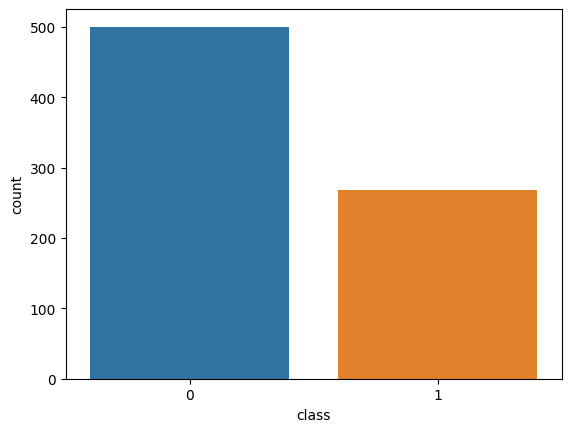

In [ ]:
sns.countplot(x = 'class', data = df)

# 7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables

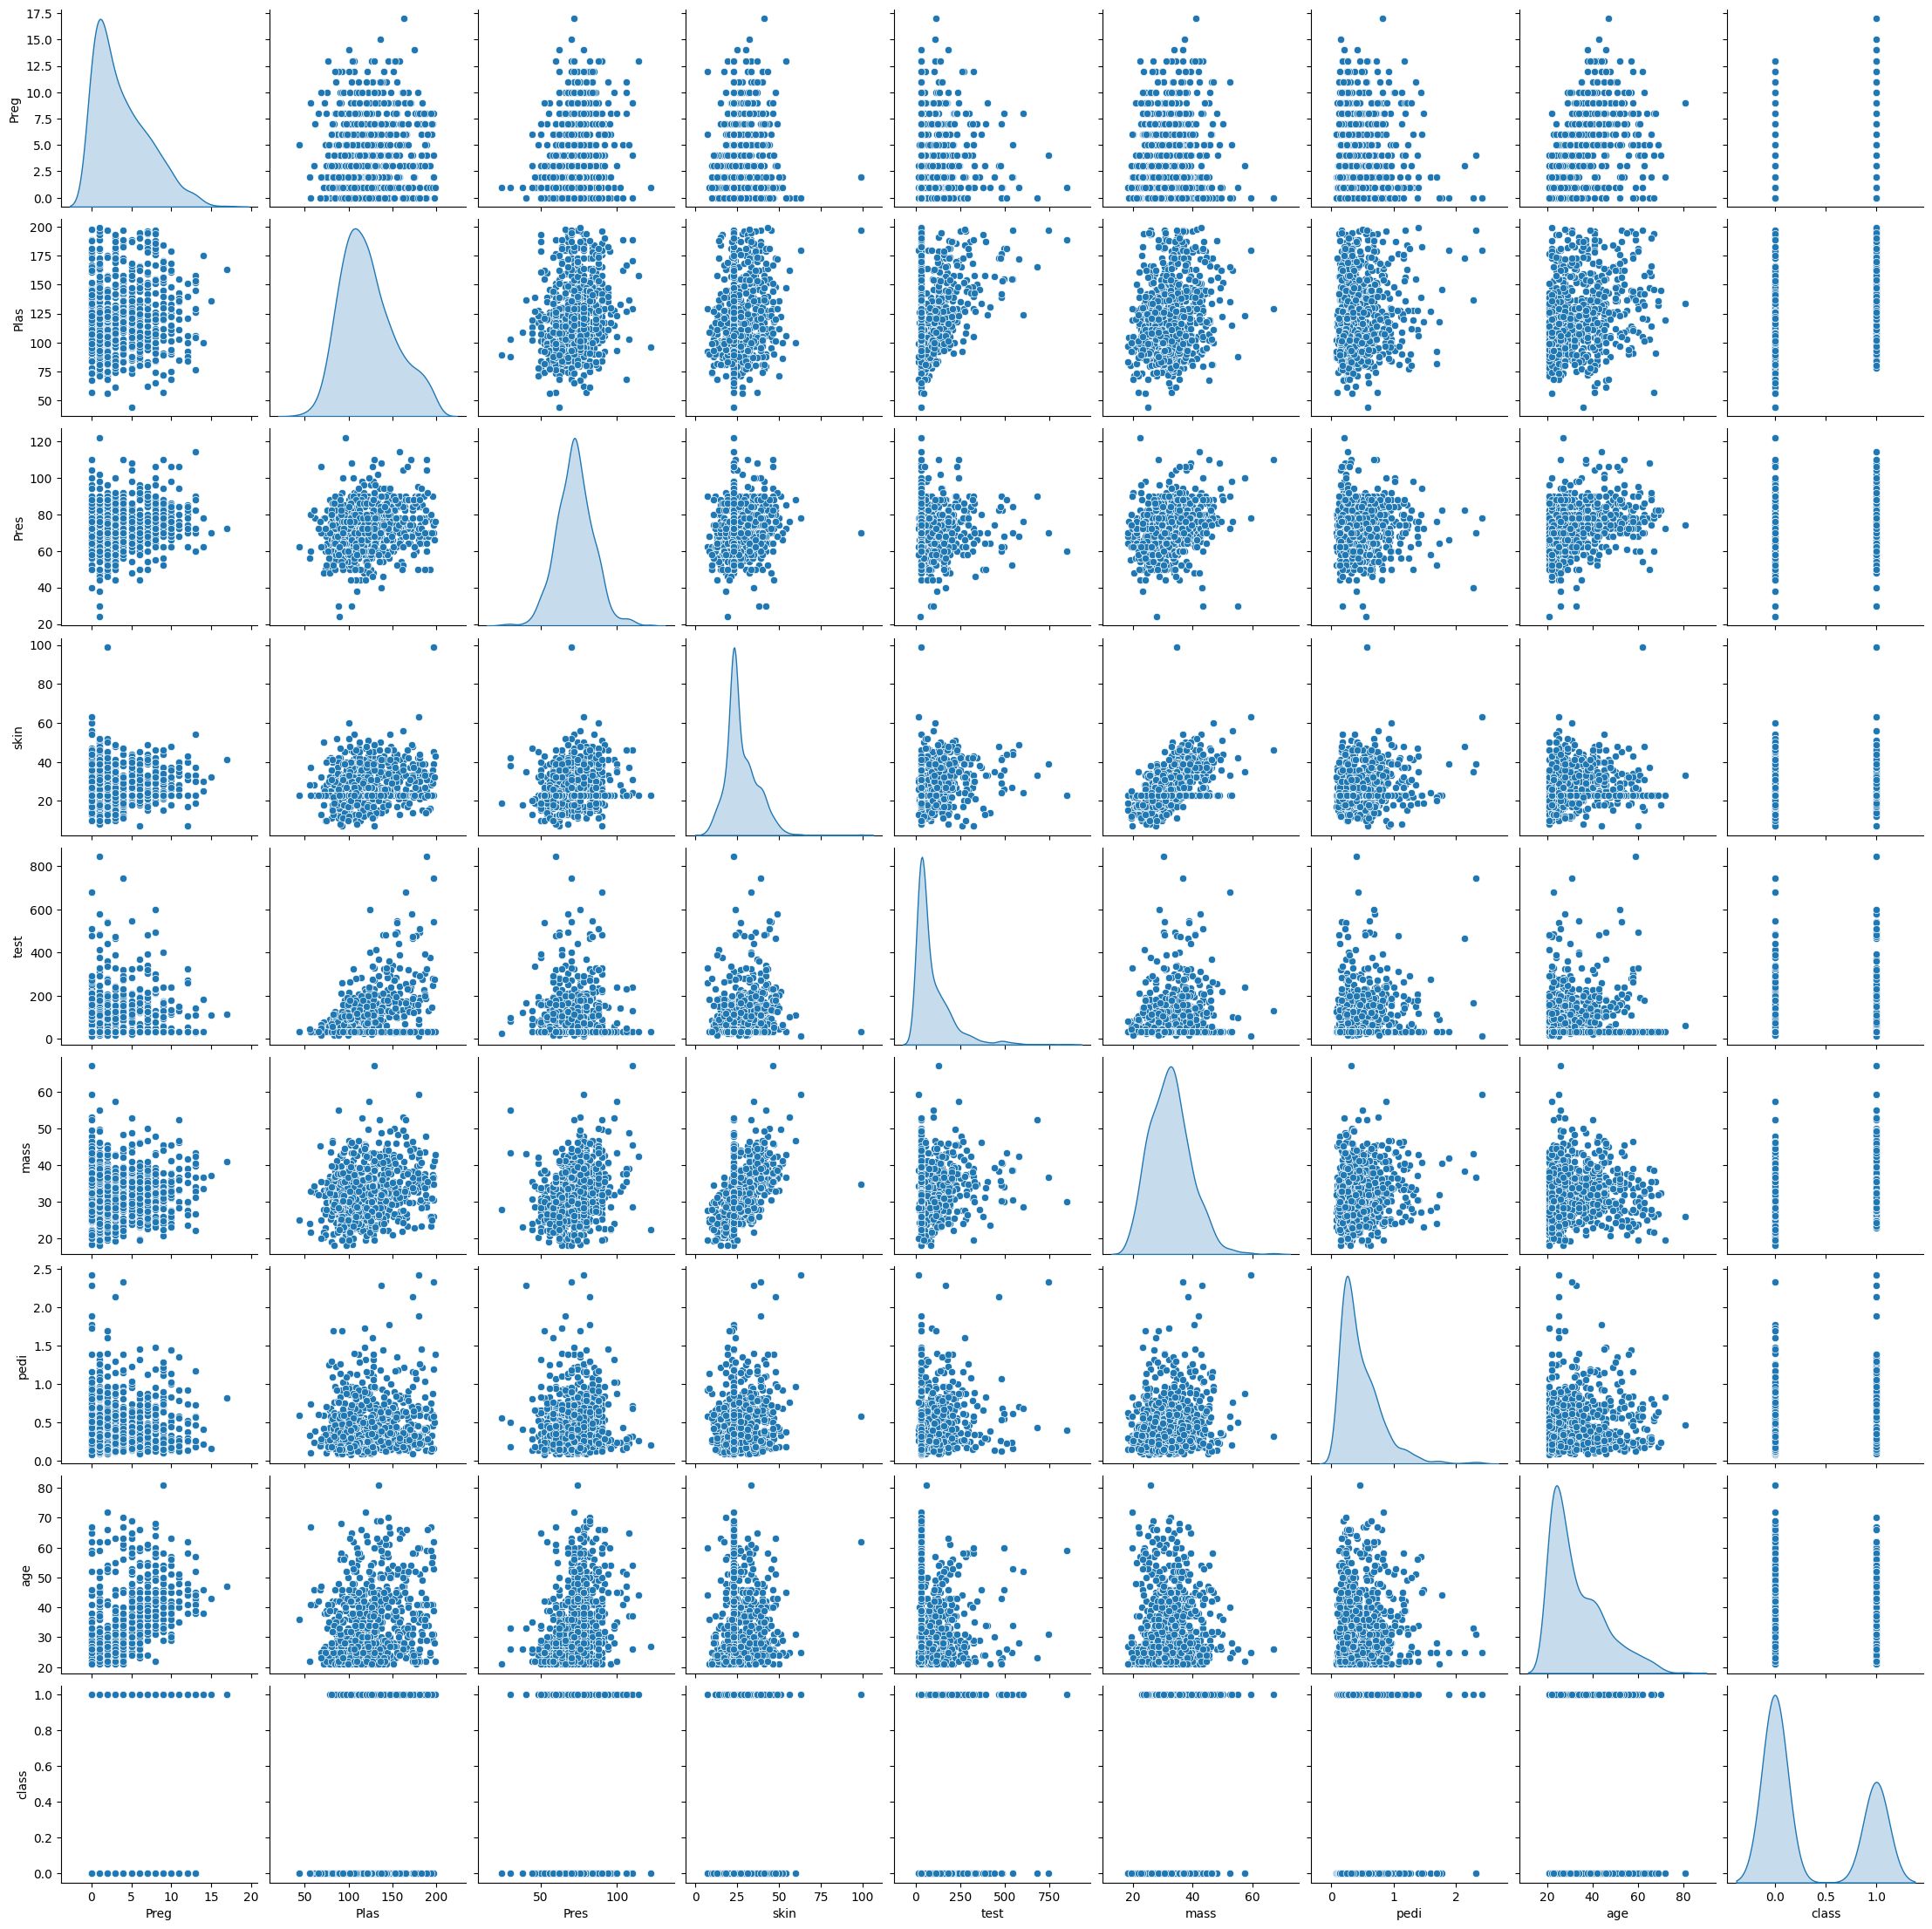

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

In [ ]:
df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Plas,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
Pres,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
skin,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
test,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
mass,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
pedi,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


In [ ]:
corr_matrix = df.corr()
high_corr = corr_matrix[(corr_matrix > 0.8) | (corr_matrix < -0.8)]
high_corr

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plas,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pres,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
skin,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
test,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
mass,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
pedi,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Check for correlation between variables whose values are >0.8

In [ ]:
#We can see that there are no variables having more than 80% of correlation either postive or negative
#From the pair plot we can see that almost all the variables are not much correlated and appears as a cloud
#We can see almost all the variables are not normally distributed

# 8. Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).

In [ ]:
X = df.iloc[:,:-1]
X.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


In [ ]:
y = df.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = True)
X_train.head() , y_train.head()

(     Preg  Plas  Pres  skin   test  mass   pedi  age
 88     15   136    70    32  110.0  37.1  0.153   43
 467     0    97    64    36  100.0  36.8  0.600   25
 550     1   116    70    28   30.5  27.4  0.204   21
 147     2   106    64    35  119.0  30.5  1.400   34
 481     0   123    88    37   30.5  35.2  0.197   29,
 88     1
 467    0
 550    0
 147    0
 481    0
 Name: class, dtype: int64)

In [ ]:
X_test.head() , y_test.head()

(     Preg  Plas  Pres  skin   test  mass   pedi  age
 285     7   136    74    26  135.0  26.0  0.647   51
 101     1   151    60    23   30.5  26.1  0.179   22
 581     6   109    60    27   30.5  25.0  0.206   27
 352     3    61    82    28   30.5  34.4  0.243   46
 726     1   116    78    29  180.0  36.1  0.496   25,
 285    0
 101    0
 581    0
 352    0
 726    0
 Name: class, dtype: int64)

# 9. Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

# 10. Print the accuracy of the model & print the confusion matrix

In [29]:
#Training accuracy
dt_model.score(X_train, y_train)

1.0

In [30]:
#Testing accuracy
dt_model.score(X_test, y_test)

0.7272727272727273

In [32]:
#Confusion matrix
metrics.confusion_matrix(y_test, dt_model.predict(X_test))

array([[111,  35],
       [ 28,  57]])

# 11. Apply the Random forest model and print the accuracy of Random forest Model

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfcl_model = RandomForestClassifier()
rfcl_model.fit(X,y)

RandomForestClassifier()

In [43]:
#Training accuracy
rfcl_model.score(X, y)

1.0

In [44]:
#Confusion matrix
metrics.confusion_matrix(y_test, rfcl_model.predict(X_test))

array([[146,   0],
       [  0,  85]])

# 12. Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [46]:
from sklearn.ensemble import AdaBoostClassifier
abcl_model = AdaBoostClassifier()
abcl_model.fit(X,y)

AdaBoostClassifier()

In [47]:
#Training accuracy
abcl_model.score(X, y)

0.8190104166666666

In [48]:
#Confusion matrix
metrics.confusion_matrix(y_test, abcl_model.predict(X_test))

array([[133,  13],
       [ 26,  59]])

# 13. Apply Bagging Classifier Algorithm and print the accuracy.

In [39]:
from sklearn.ensemble import BaggingClassifier
bgcl_model = BaggingClassifier(oob_score = True)
bgcl_model.fit(X,y)
bgcl_model.oob_score_

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


0.7135416666666666

In [40]:
#Training accuracy
bgcl_model.score(X, y)

0.9817708333333334

In [41]:
#Confusion matrix
metrics.confusion_matrix(y_test, bgcl_model.predict(X_test))

array([[145,   1],
       [  3,  82]])

# 14. Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl_model = GradientBoostingClassifier()
gbcl_model.fit(X,y)

GradientBoostingClassifier()

In [52]:
#Training accuracy
gbcl_model.score(X, y)

0.90625

In [53]:
#Confusion matrix
metrics.confusion_matrix(y_test, gbcl_model.predict(X_test))

array([[142,   4],
       [ 12,  73]])